# Defining the Data Analysis Workflow and Understanding the Model and Data

In [24]:
import os
import sys
import warnings

import importlib

# Append parent directory to sys.path
sys.path.append(os.path.join(os.path.abspath('..')))

# Ignore warnings
warnings.filterwarnings('ignore')

In [25]:
# Import data handling module
import src.data_handling as data_handling
import src.oil_price_analyzer as oil_price_analyzer
import src.oil_price_visualizer as oil_price_visualizer
import src.world_bank_data_fetcher as world_bank_data_fetecher
import src.holistic_oil_price_analyzer as holistic_oil_price_analyzer
import src.improved_oil_price_predictor as improved_oil_price_predictor

In [26]:
# Reload the module
importlib.reload(data_handling)
importlib.reload(oil_price_analyzer)
importlib.reload(oil_price_visualizer)
importlib.reload(world_bank_data_fetecher)
importlib.reload(holistic_oil_price_analyzer)
importlib.reload(improved_oil_price_predictor)

<module 'src.improved_oil_price_predictor' from 'c:\\Users\\Hp\\Desktop\\Kifiya\\week10\\BrentOilPrice-EventAnalysis\\src\\improved_oil_price_predictor.py'>

In [27]:
# Import the DataHandler class
from src.data_handling import DataHandler

In [28]:
# Initialize the DataHandler
handler = DataHandler('../data/Copy of BrentOilPrices.csv')

Data successfully loaded from CSV file
Data successfully loaded into table: BrentOilPrices
Data from the database is loaded
Head of the dataset:
        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63
Shape of the dataset: (9011, 2)
Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None
Missing values in the dataset:
Date     0
Price    0
dtype: int64
Descriptive statistics:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64
Skewness of the Price feature: 0.7653045224332095
The feature price is mo

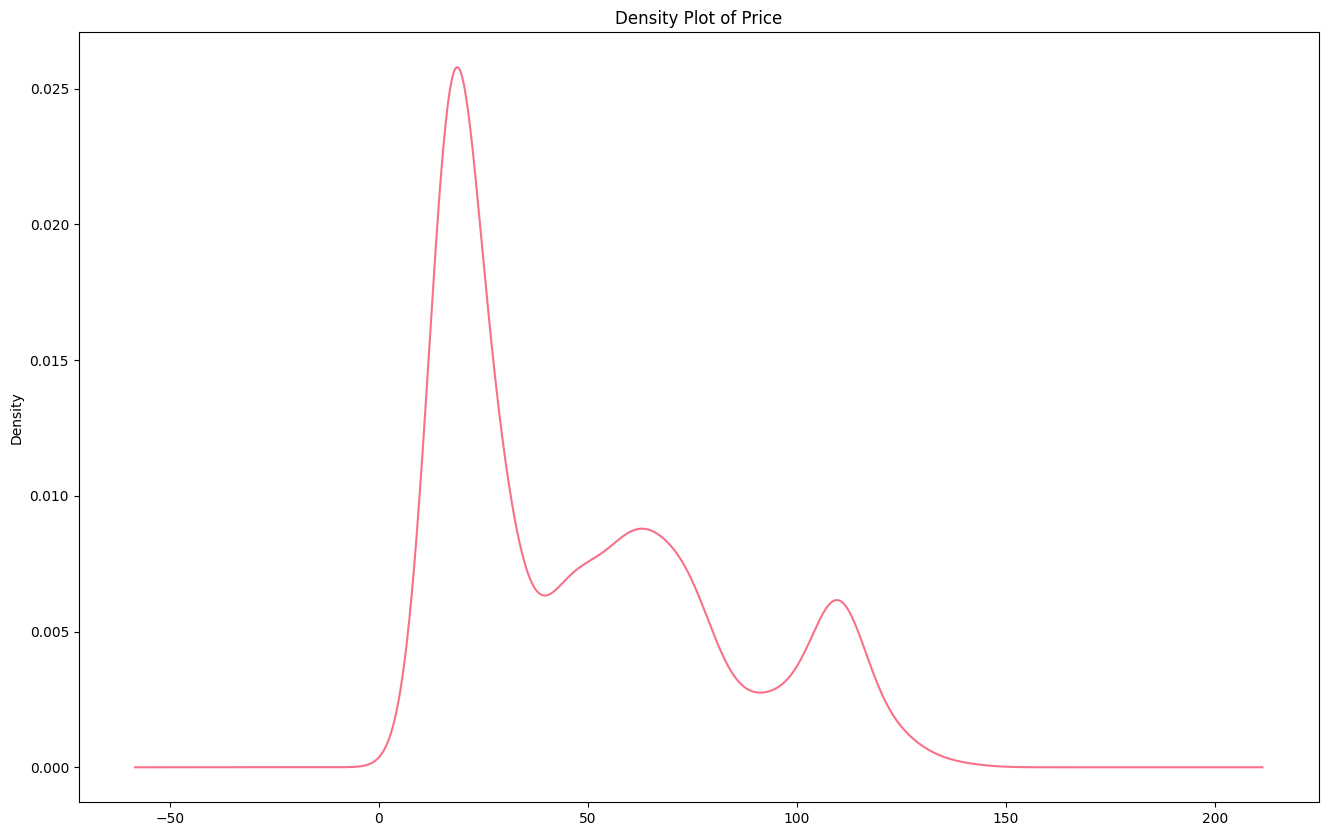

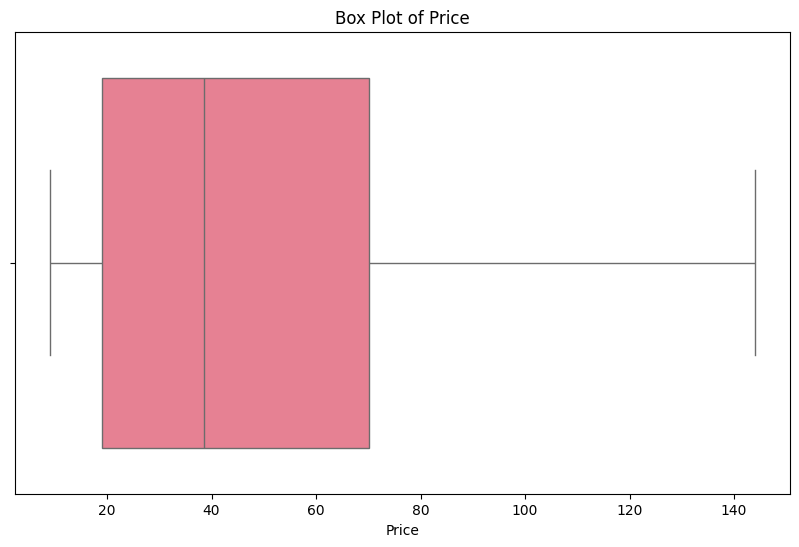

Missing values after setting the index:
Price    3952
dtype: int64
First few rows after interpolating missing values:
                Price
Date                 
1987-05-20  18.630000
1987-05-21  18.450000
1987-05-22  18.550000
1987-05-23  18.566667
1987-05-24  18.583333
Price distribution shows that 57.83% of the data are in the 0 to 50 price range.


In [29]:
# Load and prepare the data
handler.load_and_prepare_data()
handler.perform_eda()

In [30]:
# Get the DataFrame for further analysis
df = handler.get_dataframe()

# Display the first few rows of the DataFrame
print("DataFrame for further analysis:")
df.head()

DataFrame for further analysis:


,Price
Date,
1987-05-20,18.630000
1987-05-21,18.450000
1987-05-22,18.550000
1987-05-23,18.566667
1987-05-24,18.583333


## Step 2: Exploratory Data Analysis (EDA)
### 2.1 Plot Time Series of Brent Oil Prices

In [31]:
from src.oil_price_visualizer import OilPriceVisualizer

# Using oil price DataFrame
visualizer = OilPriceVisualizer(df)

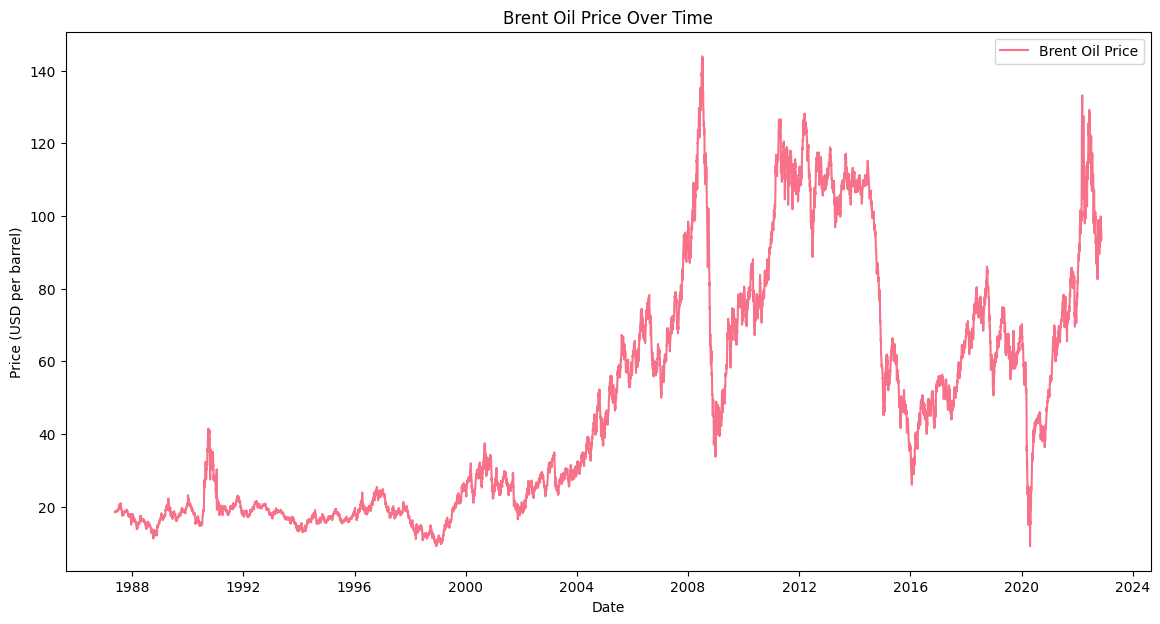

In [32]:
# Line graph for visual price trend over time 
visualizer.plot_price_trend()

### 2.2 Price trend over years

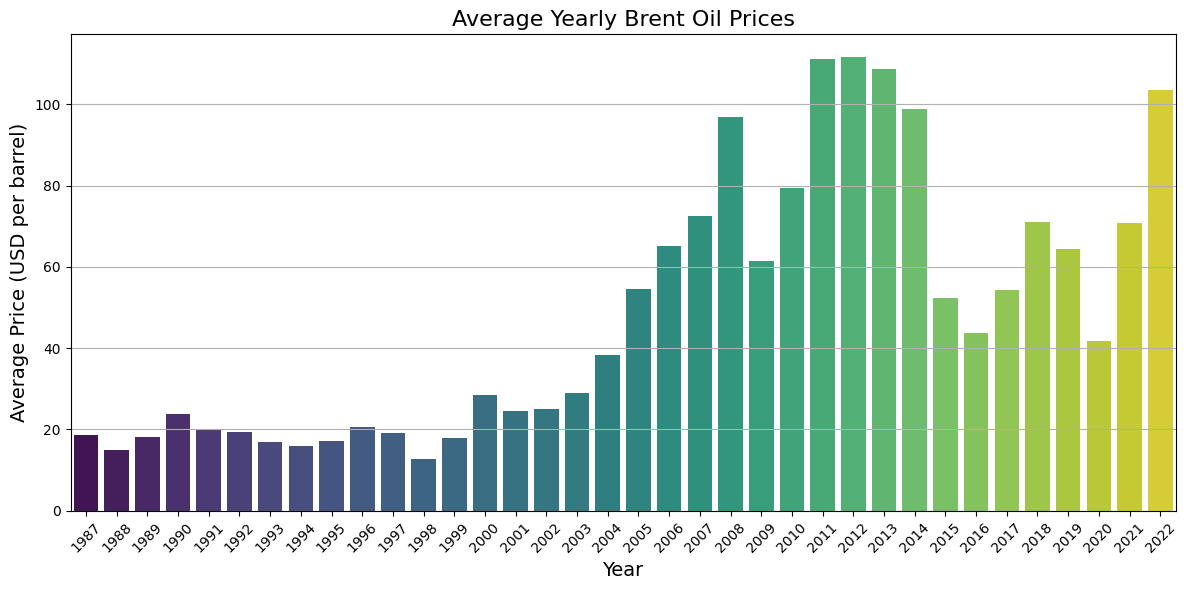

In [33]:
# Plot yearly average prices using seaborn
visualizer.plot_yearly_average()

### 2.3 Add Event Markers

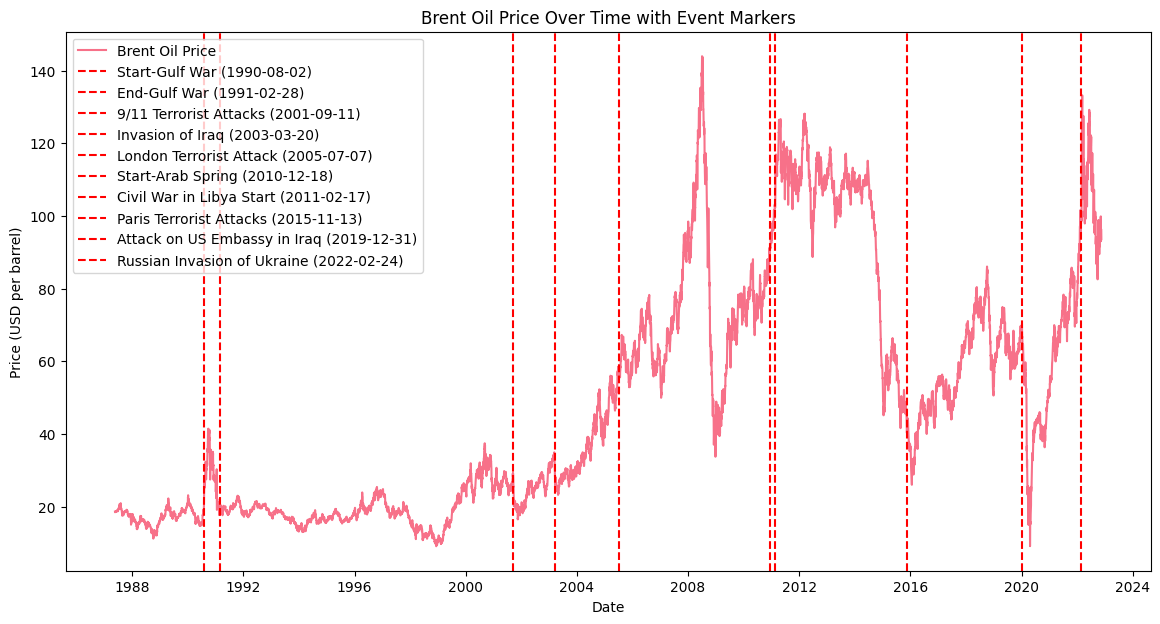

In [34]:
# Marking significant political events
visualizer.plot_with_events()

### 2.4 Rolling standard deviation

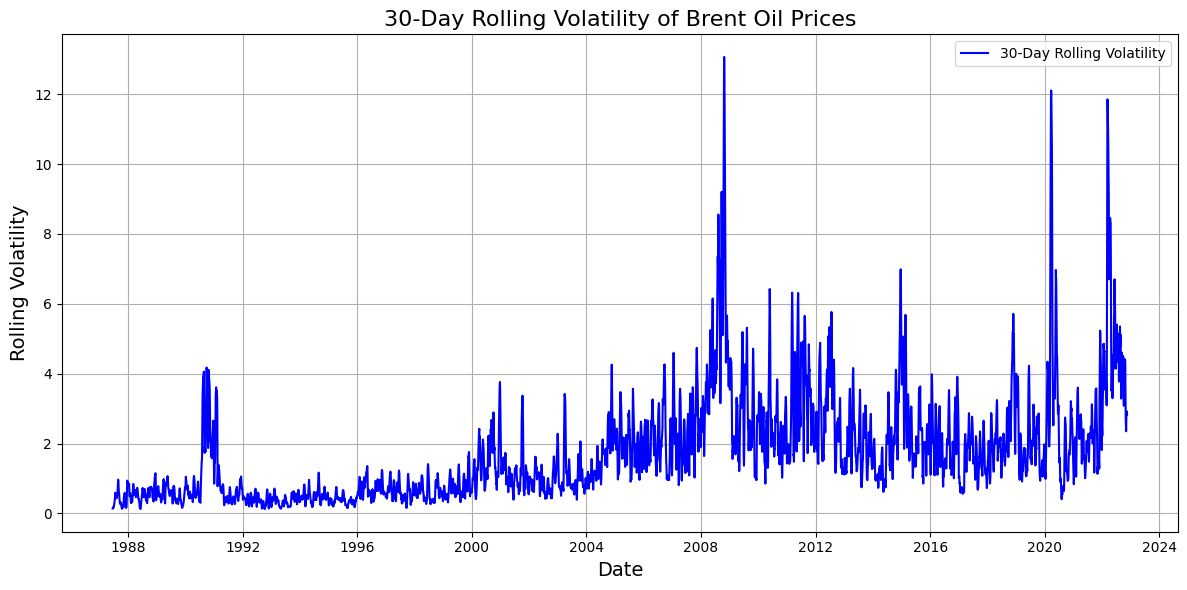

In [35]:
# Plot the rolling standard deviation
visualizer.plot_rolling_volatility()

### 2.5 Seasonal Decomposition

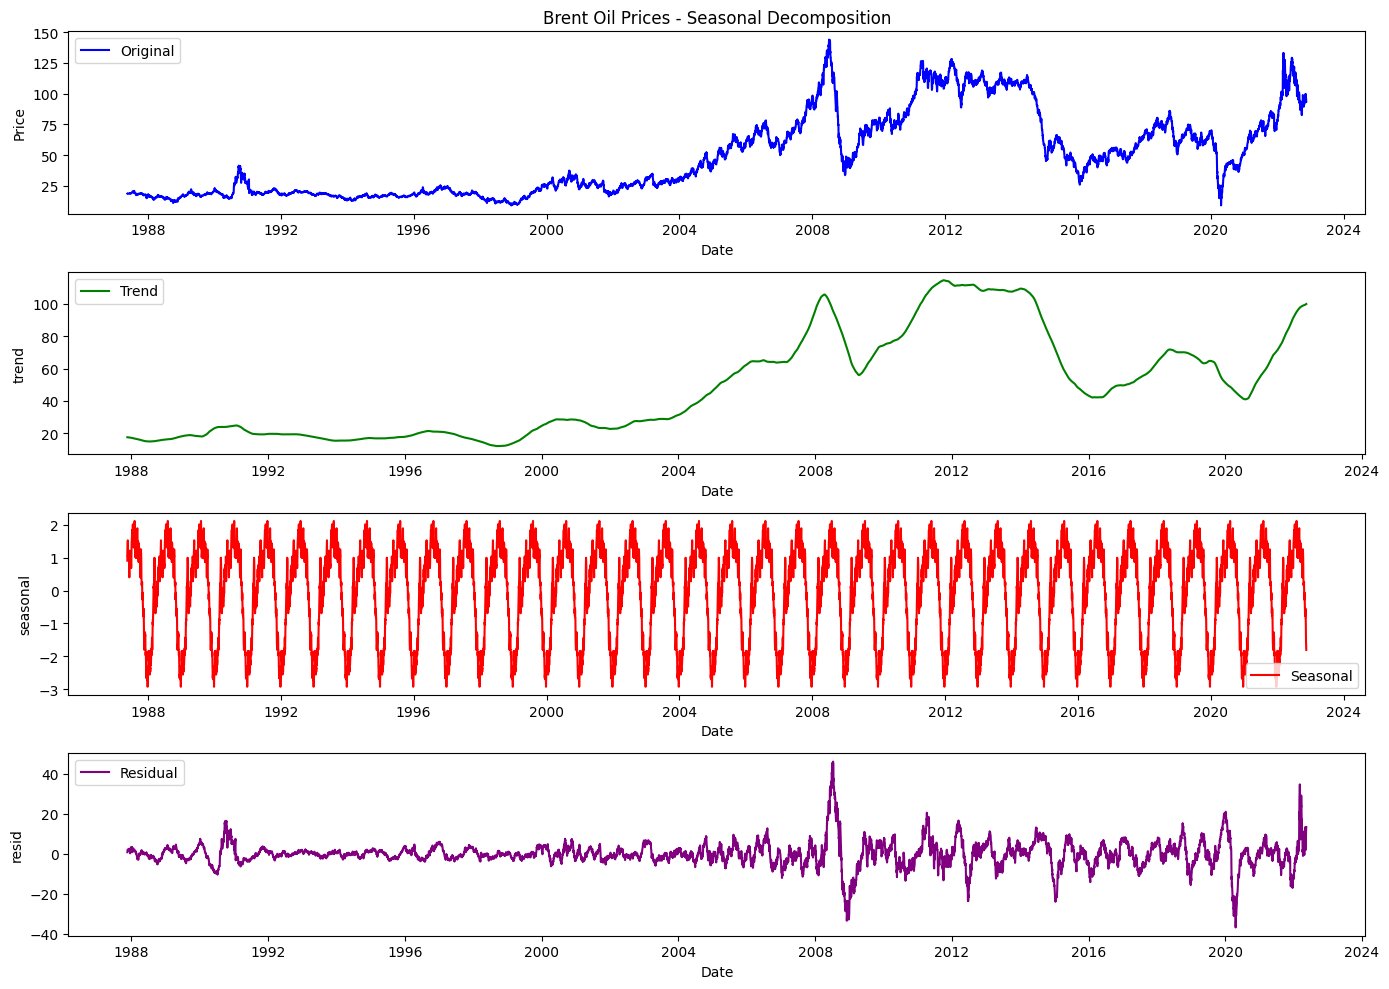

In [36]:
# Plot the decomposition using seaborn
visualizer.plot_seasonal_decomposition()

### Step 3: Further analysis

#### 3.1 Stationarity Test (ADF Test) and Differencing to Achieve Stationarity

In [37]:
from src.oil_price_analyzer import OilPriceAnalyzer

# Oil Price DataFrame
analyzer = OilPriceAnalyzer(df)

First Differencing:
ADF Statistic: -15.557886586192856
p-value: 2.0603195544135613e-28
Critical Values:
   1%: -3.430856238367017
   5%: -2.8617637328133783
   10%: -2.566889088035206
The ADF test suggests the series is stationary.


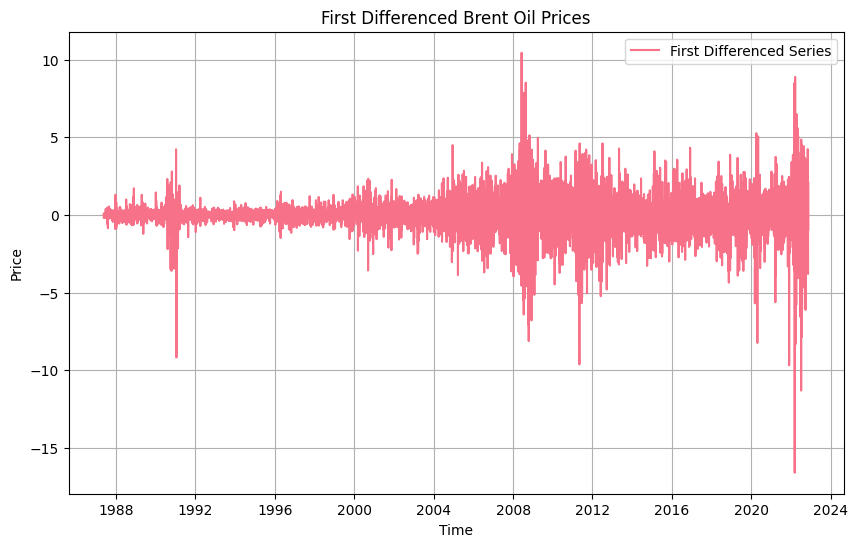


Log Differencing:
ADF Statistic: -18.329627967434195
p-value: 2.2572038294149942e-30
Critical Values:
   1%: -3.430855885899667
   5%: -2.861763577053167
   10%: -2.566889005125185
The ADF test suggests the series is stationary.


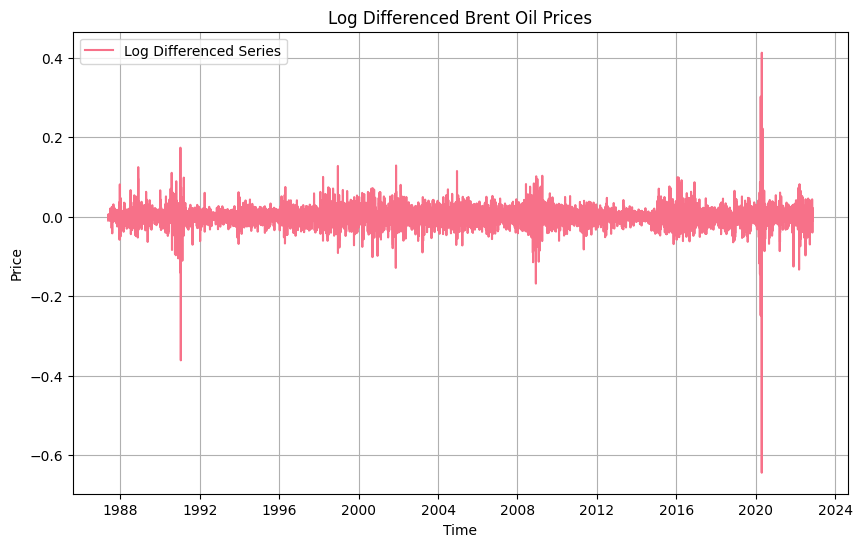

In [39]:
# Sationary test
analyzer.analyze_stationarity()

#### ADF Test Results for Differenced Series

- **ADF Statistic**: -15.557886586192822
- **p-value**: 2.0603195544137236e-28
- **Critical Values**:
  - 1%: -3.430856238367017
  - 5%: -2.8617637328133783
  - 10%: -2.566889088035206

#### Interpretation

1. **ADF Statistic**:
   - The ADF statistic is -15.557886586192822.

2. **p-value**:
   - The p-value is 2.0603195544137236e-28, which is extremely small (much less than 0.05).

3. **Critical Values**:
   - The critical values at the 1%, 5%, and 10% significance levels are -3.430856238367017, -2.8617637328133783, and -2.566889088035206, respectively.

4. **Conclusion**:
   - The ADF statistic (-15.557886586192822) is much lower than all the critical values at the 1%, 5%, and 10% significance levels.
   - The p-value (2.0603195544137236e-28) is much less than 0.05.
   - Therefore, we can reject the null hypothesis (which states that the series has a unit root and is non-stationary) with very high confidence.
   - **The ADF test suggests that the differenced series is stationary.**

#### ADF Test Results for Log-Differenced Series

- **ADF Statistic**: -18.329627967434195
- **p-value**: 2.2572038294149942e-30
- **Critical Values**:
  - 1%: -3.430855885899667
  - 5%: -2.861763577053167
  - 10%: -2.566889005125185

#### Interpretation

1. **ADF Statistic**:
   - The ADF statistic is -18.329627967434195.

2. **p-value**:
   - The p-value is 2.2572038294149942e-30, which is extremely small (much less than 0.05).

3. **Critical Values**:
   - The critical values at the 1%, 5%, and 10% significance levels are -3.430855885899667, -2.861763577053167, and -2.566889005125185, respectively.

4. **Conclusion**:
   - The ADF statistic (-18.329627967434195) is much lower than all the critical values at the 1%, 5%, and 10% significance levels.
   - The p-value (2.2572038294149942e-30) is much less than 0.05.
   - Therefore, we can reject the null hypothesis (which states that the series has a unit root and is non-stationary) with very high confidence.
   - **The ADF test suggests that the log-differenced series is stationary.**

#### Summary

- **Differenced Series**:
  - **ADF Statistic**: -15.557886586192822
  - **p-value**: 2.0603195544137236e-28
  - **Conclusion**: The series is stationary.

- **Log-Differenced Series**:
  - **ADF Statistic**: -18.329627967434195
  - **p-value**: 2.2572038294149942e-30
  - **Conclusion**: The series is stationary.

Both the differenced and log-differenced series are highly likely to be stationary, as indicated by the extremely low p-values and ADF statistics that are well below the critical values. This suggests that either transformation can be used to make the time series stationary for further analysis, such as time series forecasting or modeling.

#### 3.2 Autocorrelation and Partial Autocorrelation Plots

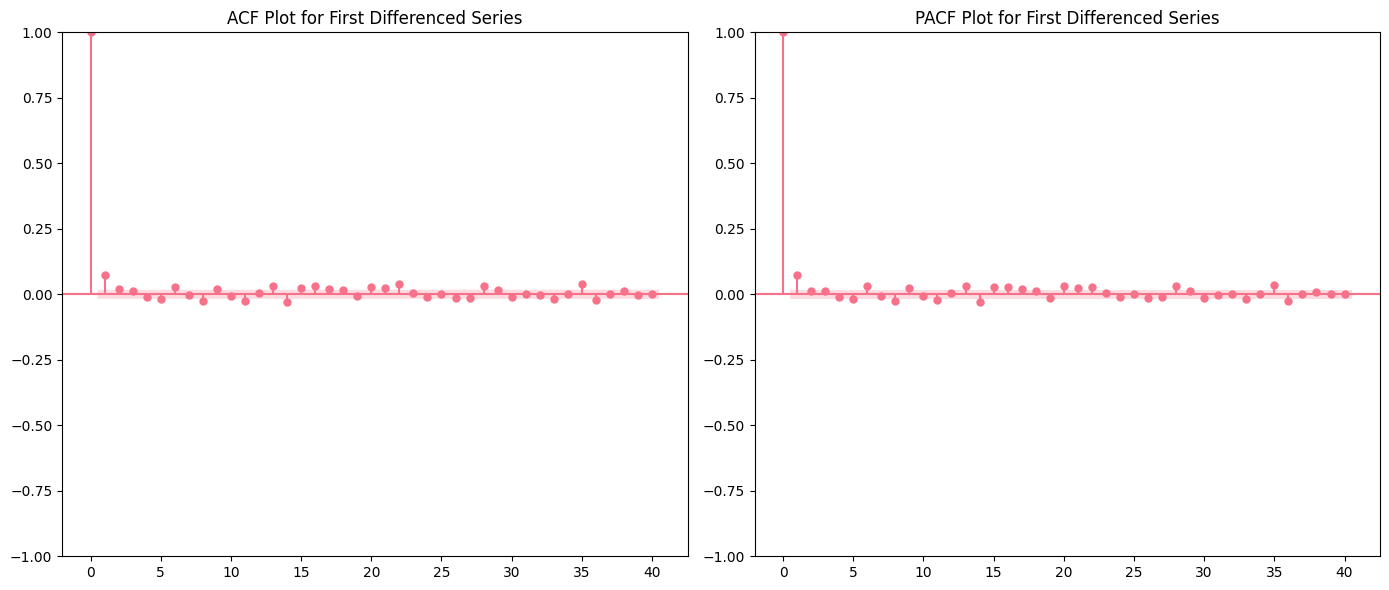

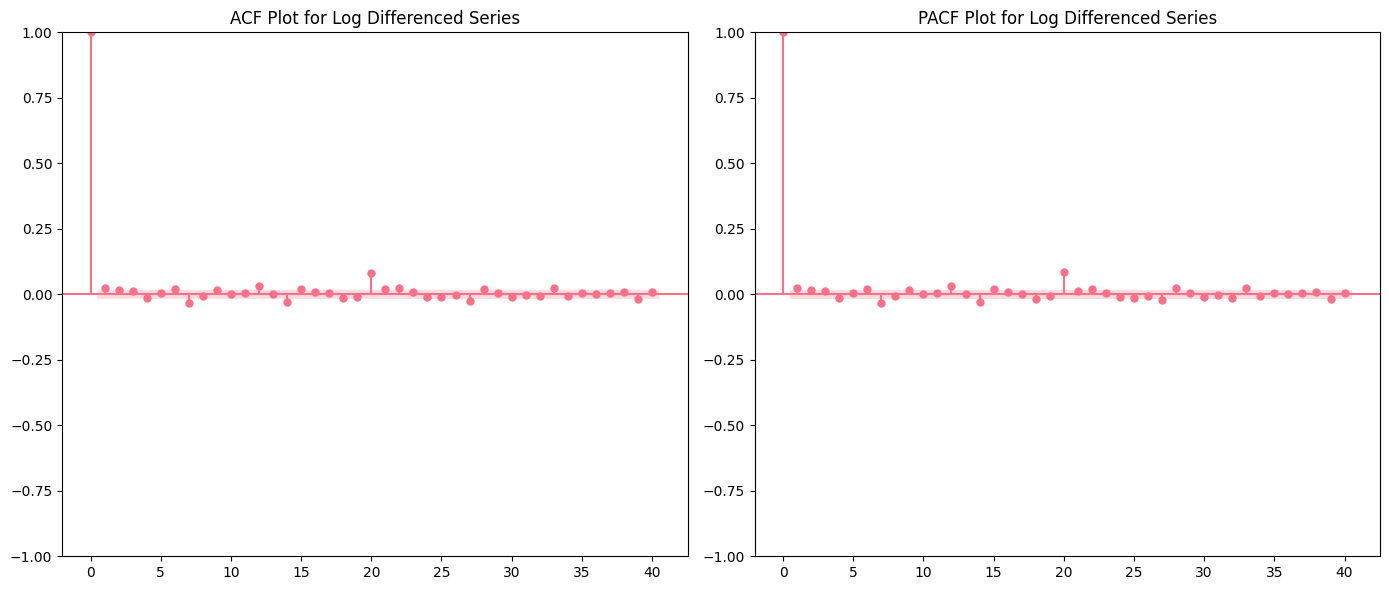

In [40]:
# ACF and PACF plots for differenced data and for log-differenced data
analyzer.plot_acf_pacf()

### 3.4 Cumulative sum of Deviations from mean (CUSUM)

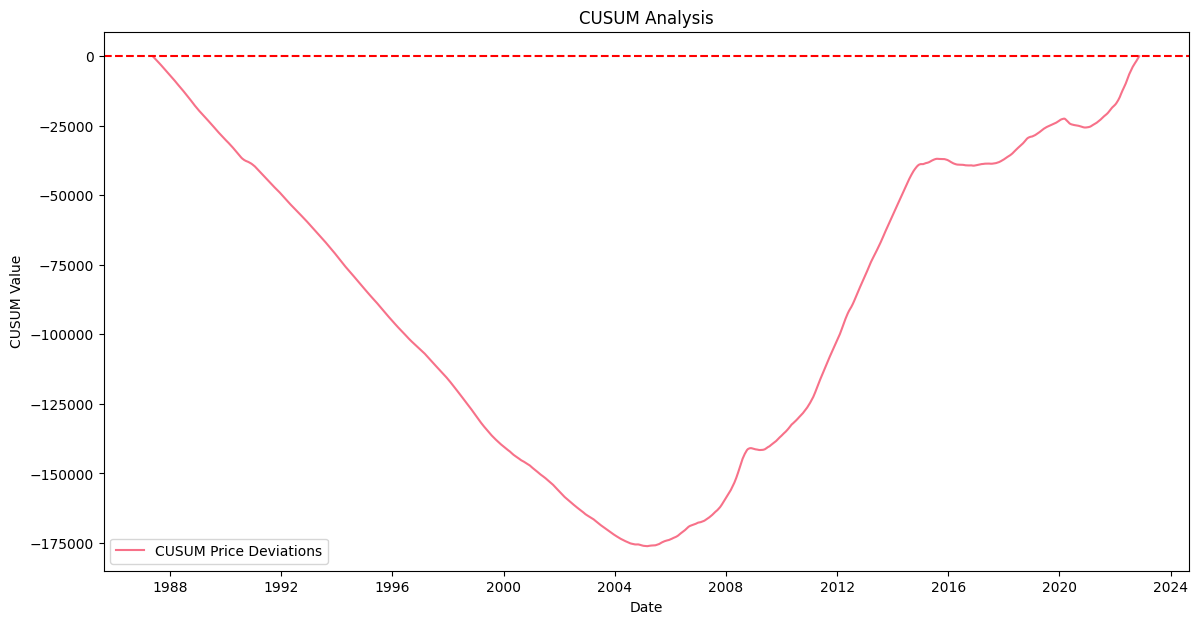

In [41]:
# CUSUM method
analyzer.cusum_analysis()

In [ ]:
# Baysian Change Point analysis
analyzer.bayesian_change_point()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mean_prior1, mean_prior2, sigma1, sigma2]



Event Impact Analysis:
                          Event        Date  Change_1M   Change_3M  Change_6M  \
0                Start-Gulf War  1990-08-02  85.465116  120.154044   0.096479   
1                  End-Gulf War  1991-02-28 -13.253012  -39.903846 -30.233368   
2        9/11 Terrorist Attacks  2001-09-11 -17.281403  -38.105046  -2.153758   
3              Invasion of Iraq  2003-03-20 -22.549609  -10.679284  -8.939709   
4       London Terrorist Attack  2005-07-07  18.829911   14.470384  40.572865   
5             Start-Arab Spring  2010-12-18  16.890681   44.914716  46.046097   
6      Civil War in Libya Start  2011-02-17  16.930730   35.313214  49.550082   
7       Paris Terrorist Attacks  2015-11-13 -24.000000  -39.686083 -29.104057   
8  Attack on US Embassy in Iraq  2019-12-31  -9.292823  -67.075276 -34.962800   
9   Russian Invasion of Ukraine  2022-02-24  34.033598   60.853945  37.118837   

   Cumulative Return Before  Cumulative Return After  
0                  0.073324  

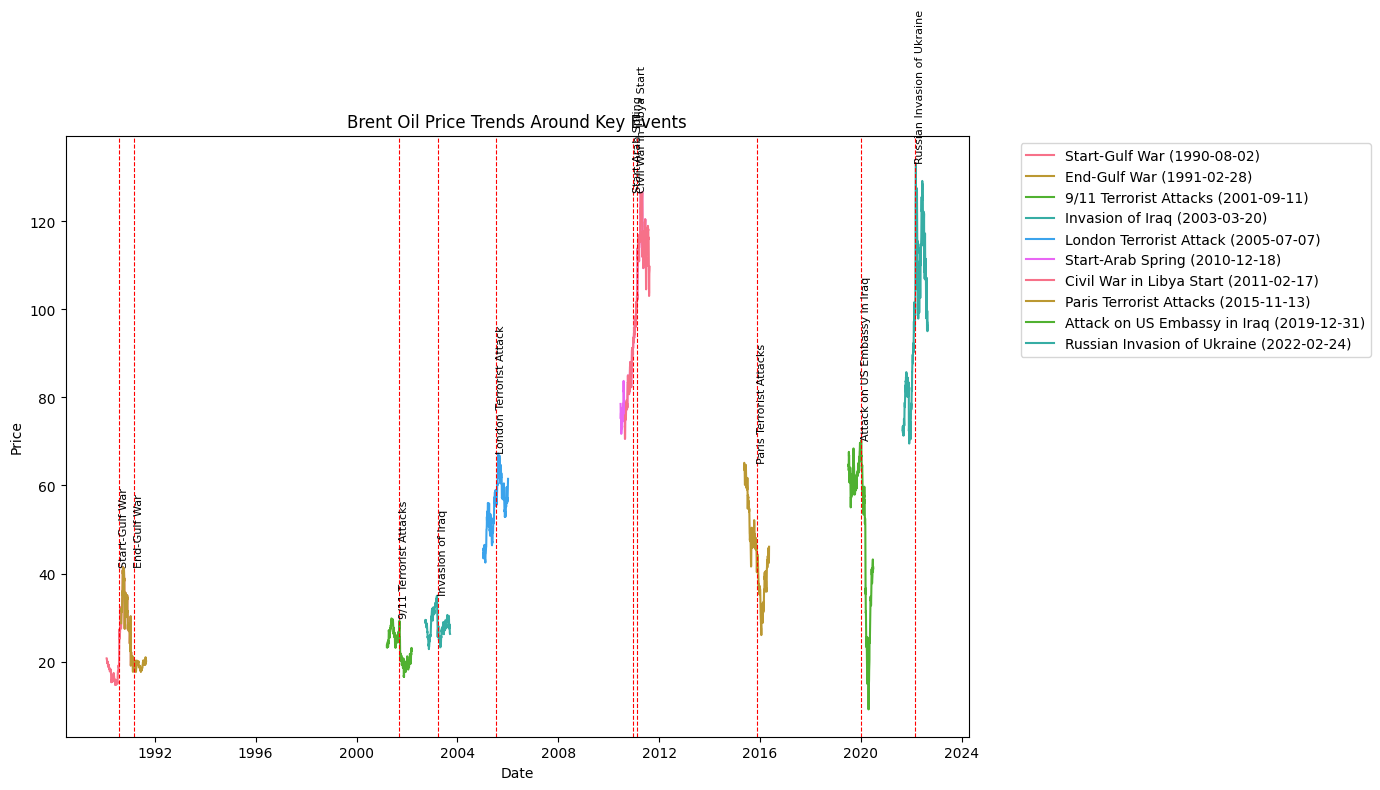

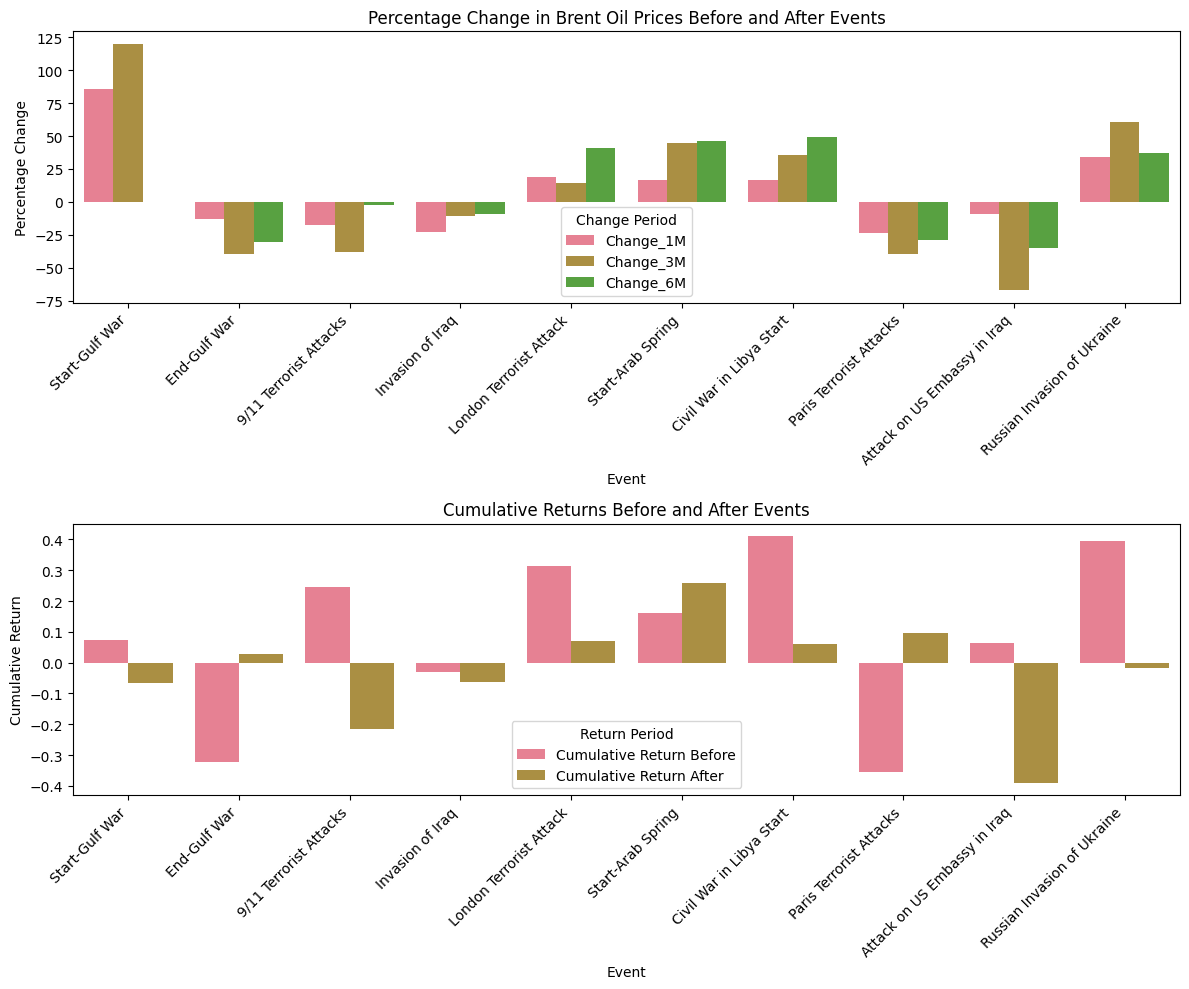


T-Test Results:
                              t-statistic        p-value
Start-Gulf War                 -32.883002  1.756291e-110
End-Gulf War                    20.592880   8.069377e-63
9/11 Terrorist Attacks          27.356628   6.285253e-90
Invasion of Iraq                 6.914184   2.153653e-11
London Terrorist Attack        -21.575368   7.458810e-67
Start-Arab Spring              -33.643475  3.509491e-113
Civil War in Libya Start       -37.810062  2.043132e-127
Paris Terrorist Attacks         24.857041   4.037663e-80
Attack on US Embassy in Iraq    17.792909   2.905155e-51
Russian Invasion of Ukraine    -33.953765  2.837240e-114


In [42]:
# Visualization of Price Trends Around Events
analyzer.analyze_events()

Add other dataset from world bank 

In [43]:
# Import the WorldBankDataFetcher class
from src.world_bank_data_fetcher import WorldBankDataFetcher

# Define your indicators
indicators = {
    'NY.GDP.MKTP.CD': {'name': 'GDP', 'country': 'WLD'},
    'FP.CPI.TOTL.ZG': {'name': 'CPI', 'country': 'WLD'},
    'SL.UEM.TOTL.ZS': {'name': 'Unemployment_Rate', 'country': 'WLD'},
    'PA.NUS.FCRF': {'name': 'Exchange_Rate', 'country': 'EMU'}
}

# Initialize the fetcher
fetcher = WorldBankDataFetcher('1987-05-20', '2022-11-14')

# Fetch, process, and save data for each indicator
for indicator_code, info in indicators.items():
    raw_data = fetcher.fetch_indicator_data(indicator_code, info['name'], info['country'])
    processed_data = fetcher.process_data(raw_data, info['name'])
    if not processed_data.empty:
        fetcher.save_data(processed_data, info['name'])

# Now you can load and use the saved data in your notebook
import pandas as pd

gdp_data = pd.read_csv('../data/GDP_cleaned_data_daily.csv')
cpi_data = pd.read_csv('../data/CPI_cleaned_data_daily.csv')
unemployment_data = pd.read_csv('../data/Unemployment_Rate_cleaned_data_daily.csv')
exchange_rate_data = pd.read_csv('../data/Exchange_Rate_cleaned_data_daily.csv')

Data loaded successfully!

Analyzing relationship between GDP and oil prices:


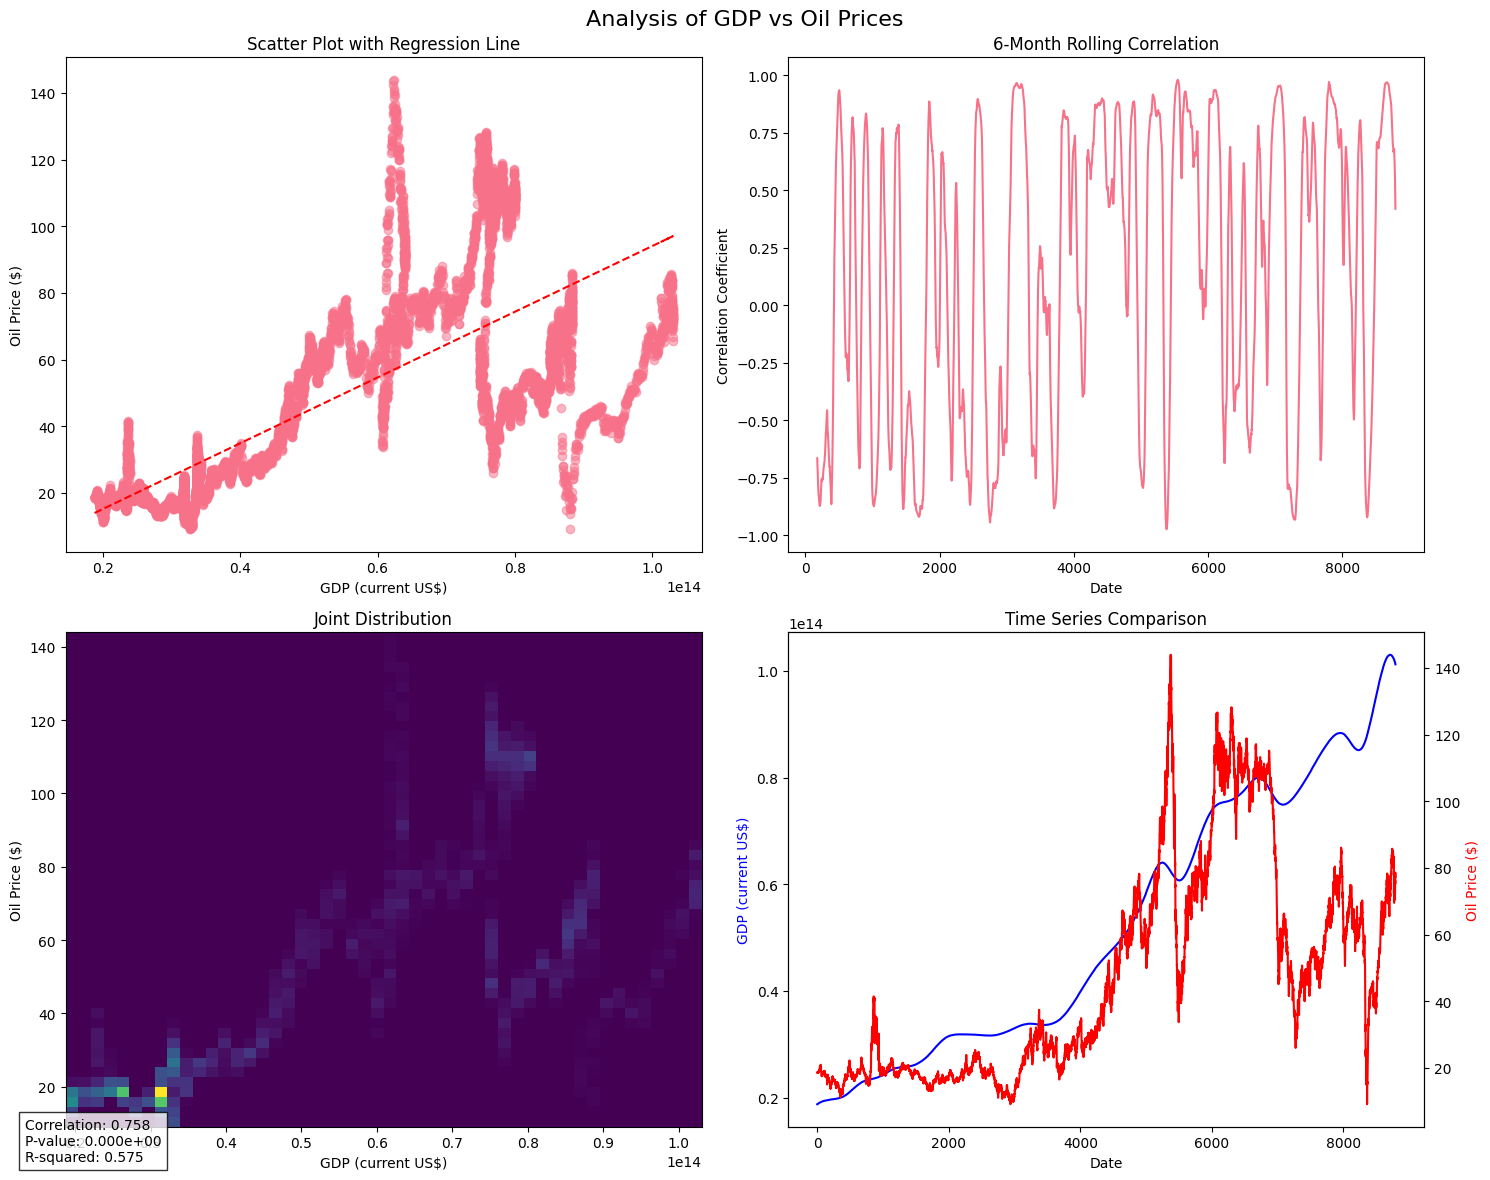


Granger Causality Test Results for GDP:

Testing if indicator Granger-causes oil prices:

Testing if oil prices Granger-cause indicator:

Analyzing relationship between CPI and oil prices:


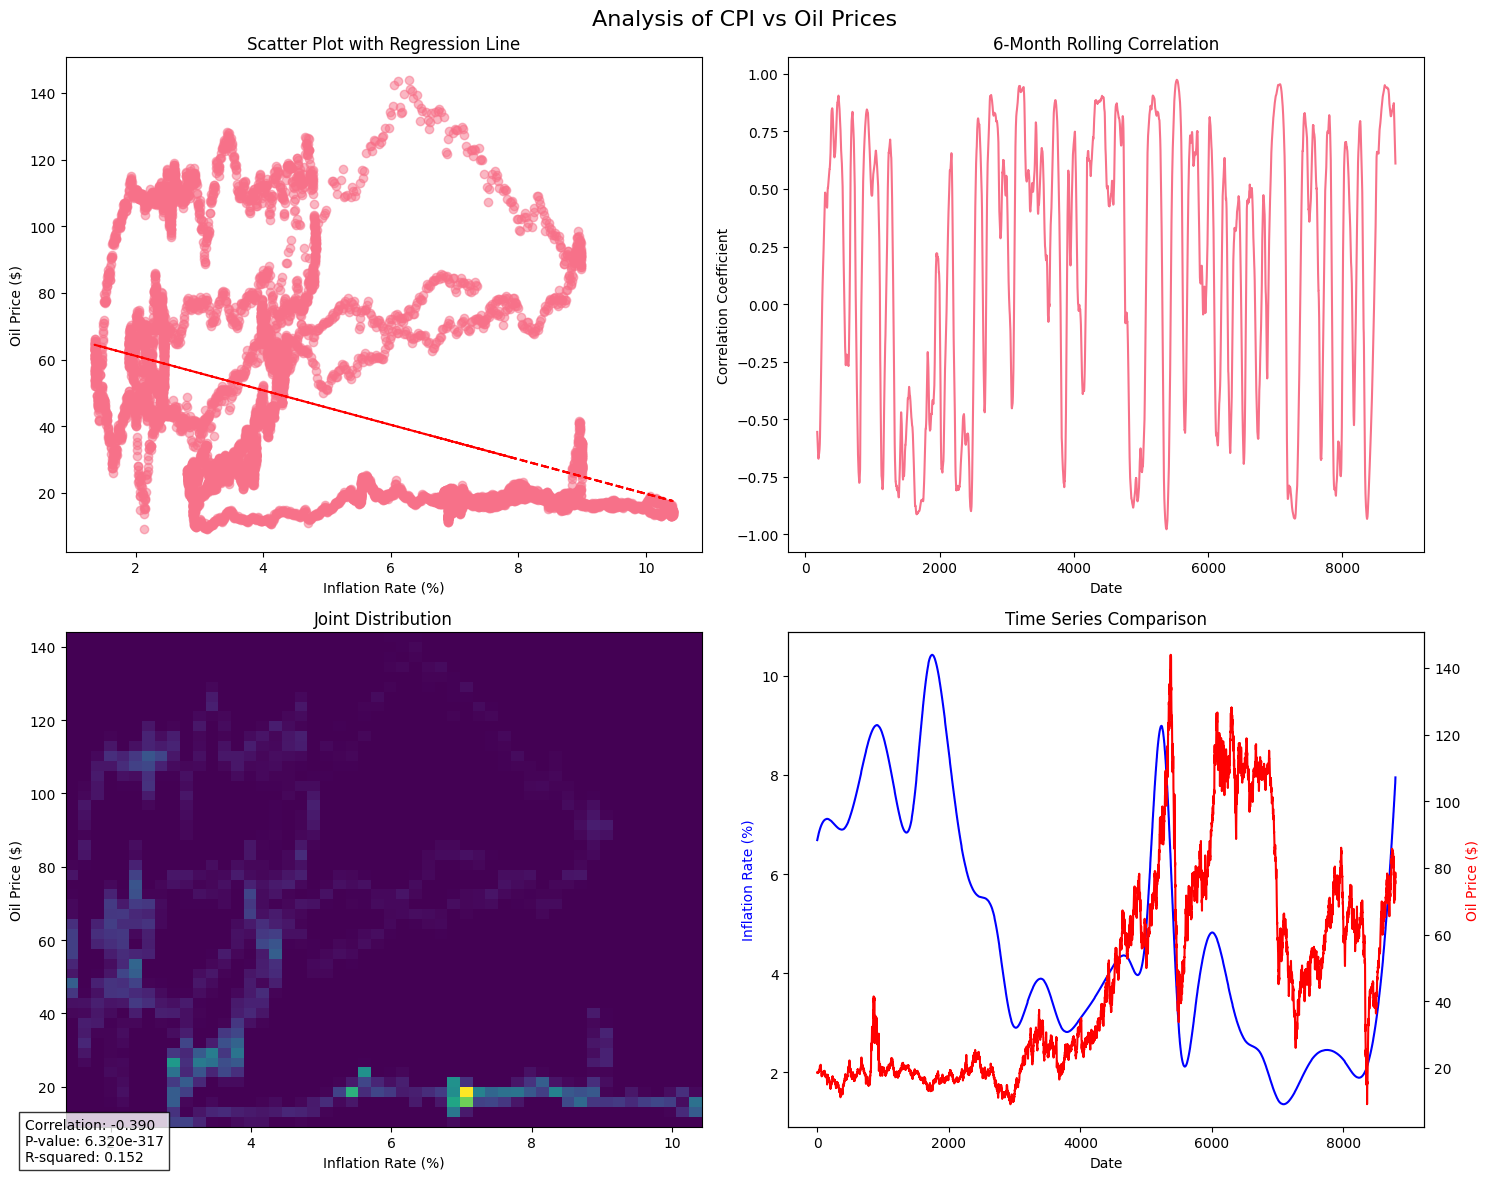


Granger Causality Test Results for CPI:

Testing if indicator Granger-causes oil prices:

Testing if oil prices Granger-cause indicator:

Analyzing relationship between Unemployment_Rate and oil prices:


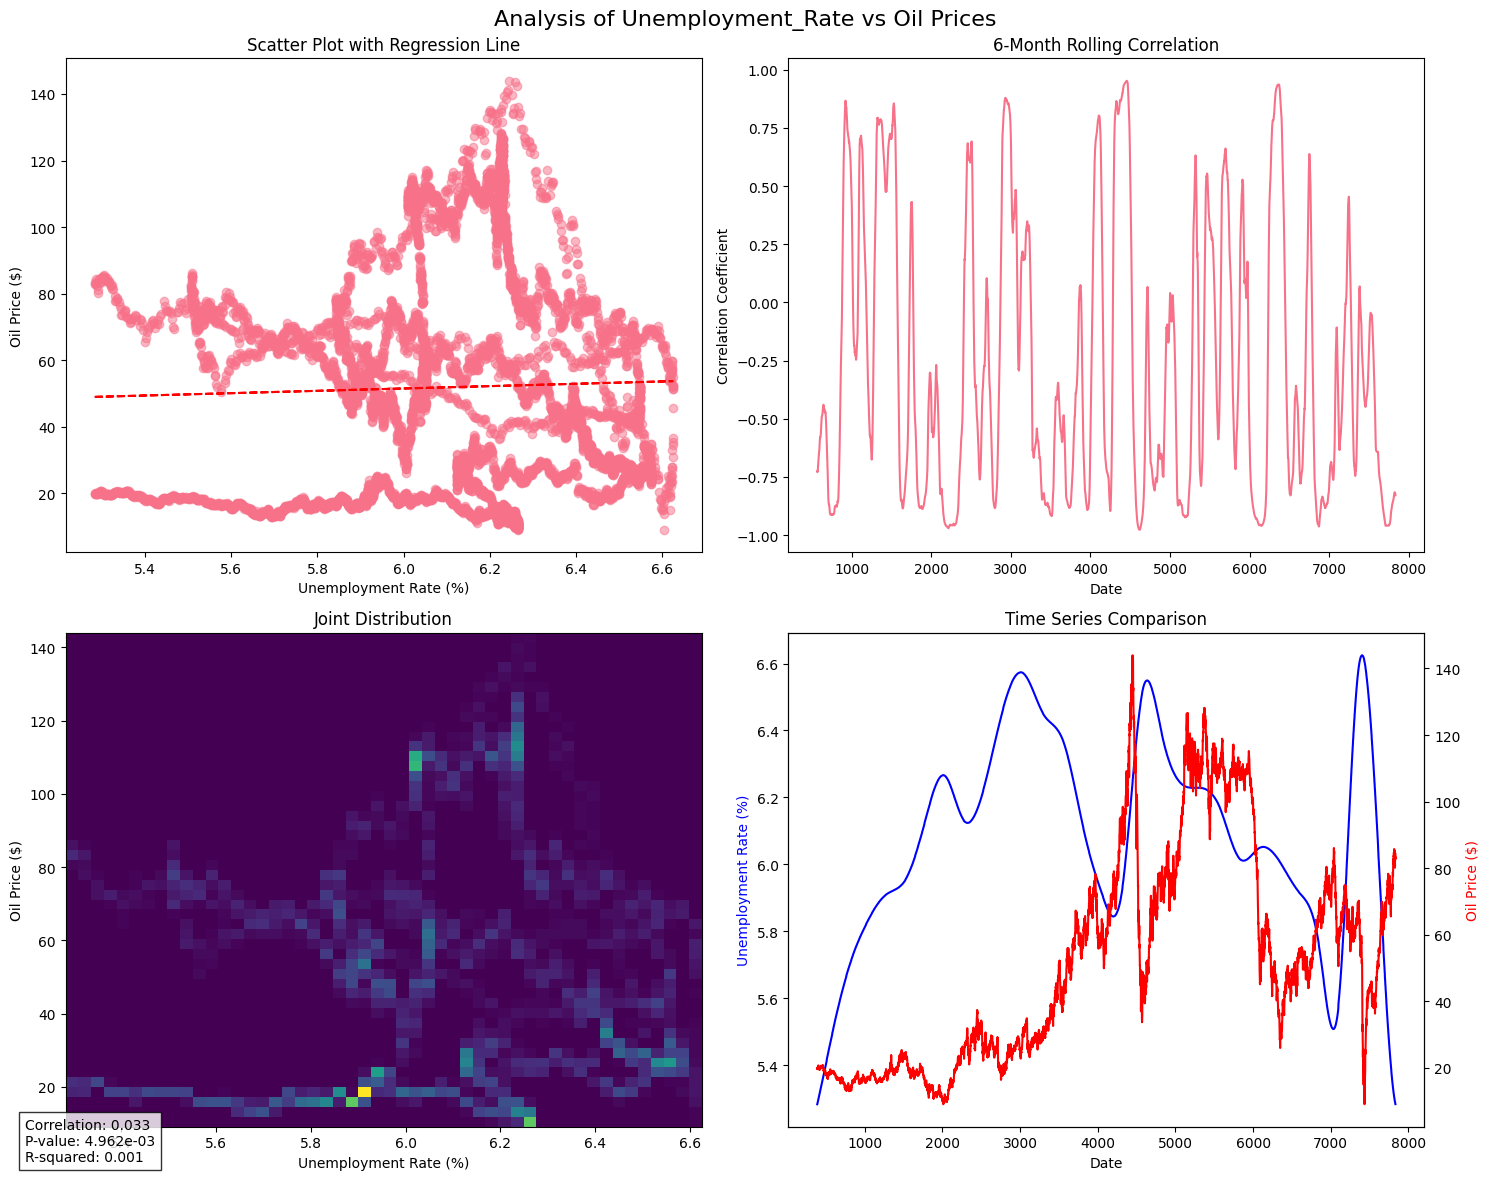


Granger Causality Test Results for Unemployment_Rate:

Testing if indicator Granger-causes oil prices:

Testing if oil prices Granger-cause indicator:

Analyzing relationship between Exchange_Rate and oil prices:


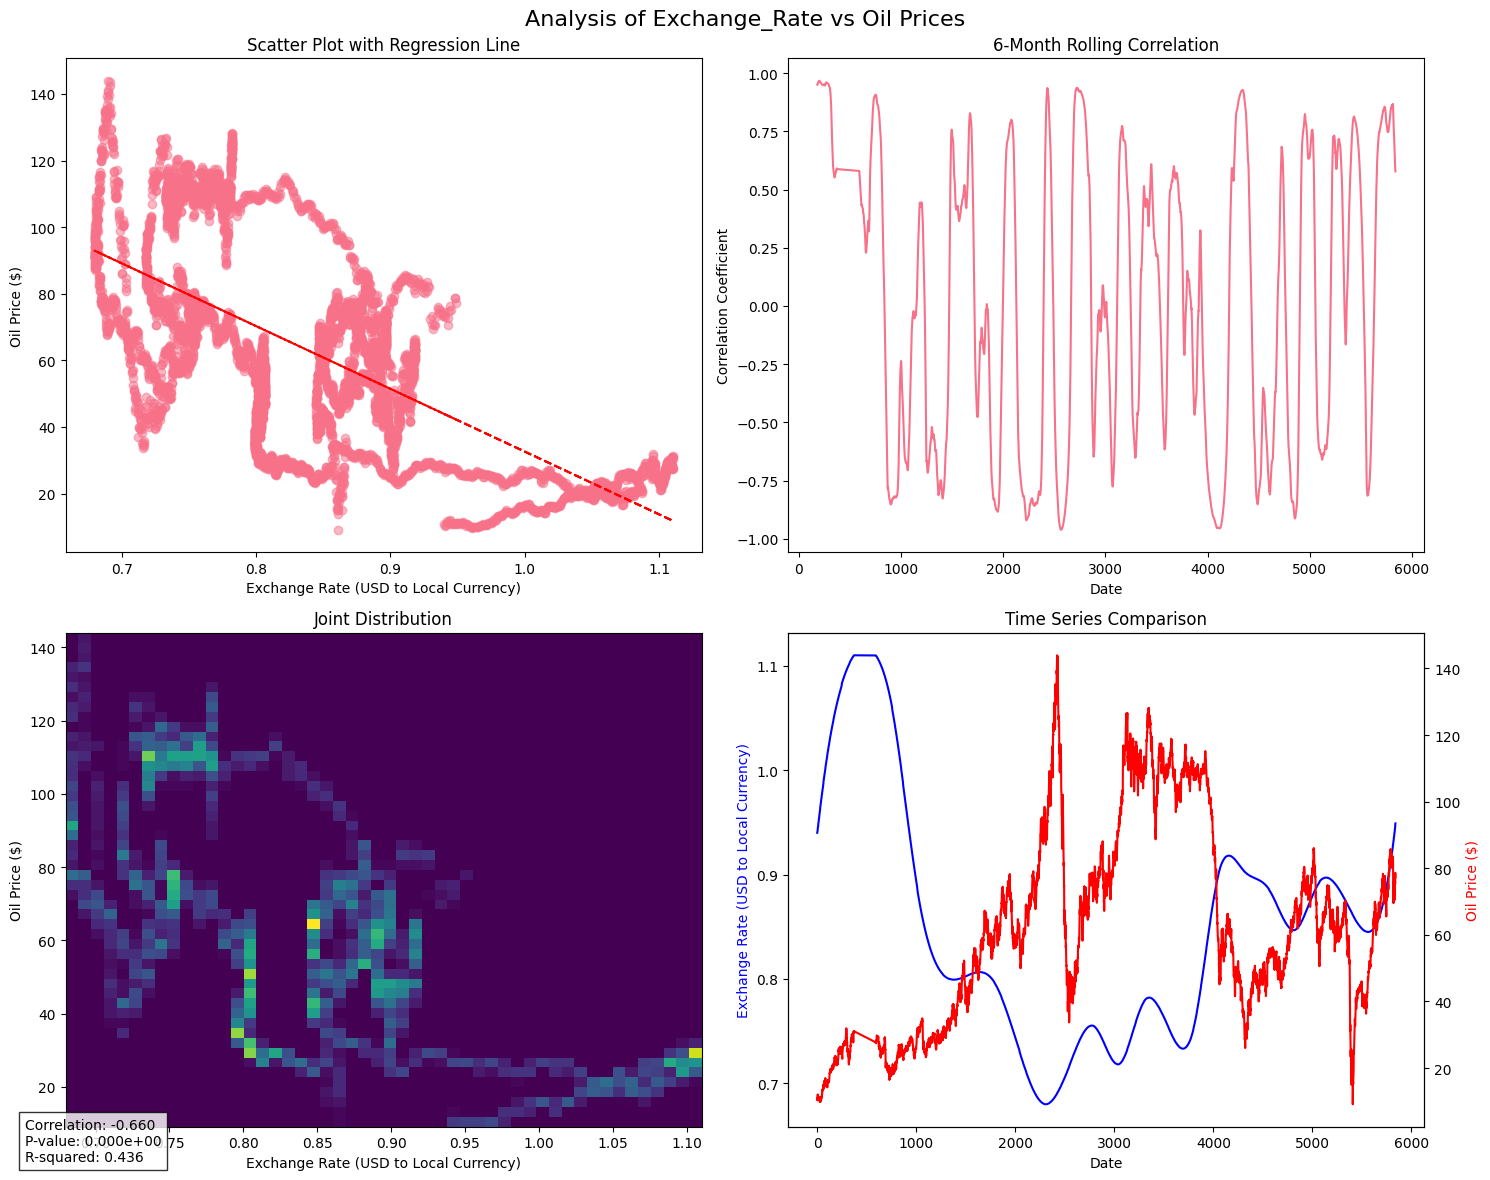


Granger Causality Test Results for Exchange_Rate:

Testing if indicator Granger-causes oil prices:

Testing if oil prices Granger-cause indicator:


In [44]:
from src.holistic_oil_price_analyzer import analyze_indicators

# Load the data
try:
    gdp_data_daily = pd.read_csv("../data/GDP_cleaned_data_daily.csv")
    gdp_data_daily['Date'] = pd.to_datetime(gdp_data_daily['Date'])
    
    cpi_data_daily = pd.read_csv("../data/CPI_cleaned_data_daily.csv")
    cpi_data_daily['Date'] = pd.to_datetime(cpi_data_daily['Date'])
    
    unemployment_data_daily = pd.read_csv("../data/Unemployment_Rate_cleaned_data_daily.csv")
    unemployment_data_daily['Date'] = pd.to_datetime(unemployment_data_daily['Date'])
    
    exchange_rate_data_daily = pd.read_csv("../data/Exchange_Rate_cleaned_data_daily.csv")
    exchange_rate_data_daily['Date'] = pd.to_datetime(exchange_rate_data_daily['Date'])
    
    oil_data_daily = pd.read_csv("../data/Copy of BrentOilPrices.csv")
    oil_data_daily['Date'] = pd.to_datetime(oil_data_daily['Date'])
    oil_data_daily.set_index('Date', inplace=True)
    
    print("Data loaded successfully!")
    
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure all required CSV files are in the correct directory.")
    raise

# Run the analysis
if 'gdp_data_daily' in locals() and 'cpi_data_daily' in locals() and \
   'unemployment_data_daily' in locals() and 'exchange_rate_data_daily' in locals() and \
   'oil_data_daily' in locals():
    
    analyze_indicators(
        gdp_data_daily, 
        cpi_data_daily, 
        unemployment_data_daily, 
        exchange_rate_data_daily, 
        oil_data_daily
    )
else:
    print("Some required data files could not be loaded. Please check the data paths and file names.")

### 4. Model Building

#### 4.1 Initial training

In [21]:
from src.oil_price_predictor import OilPricePredictor

predictor = OilPricePredictor()
if predictor.load_data():
    predictor.train_and_evaluate()

Data loaded successfully!
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Cross-Validation Model Evaluation Results:
VAR - Average MSE: 6202363297210366337008795648.0000
ARIMA - Average MSE: 1108.1819
LSTM - Average MSE: 7.4920


#### 4.2 Improving Model Performance and Saving for the future use

Data loaded successfully!
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7626.346, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7627.627, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7628.345, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7628.339, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7628.972, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.939 seconds
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14237.186, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14241.181, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14239.181, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14239.180, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14241.106, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.937 seconds
31/31 ━━━━━━━━━━━━━

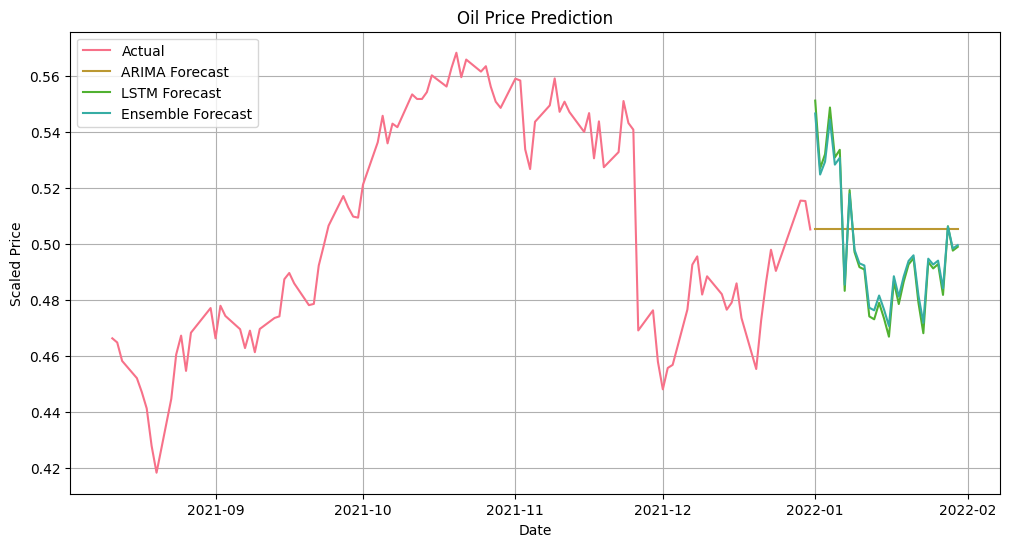


Models saved successfully.


In [22]:
from src.improved_oil_price_predictor import ImprovedOilPricePredictor

# Create an instance of the improved predictor
improved_predictor = ImprovedOilPricePredictor()

if improved_predictor.load_data():
    improved_predictor.train_and_evaluate()
    future_predictions = improved_predictor.make_future_predictions()
    improved_predictor.plot_predictions(future_predictions)
    improved_predictor.save_models()